In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel('Homework 2 Data.xlsx')
data

,Maturity,Price
0,0.083333,99.73
1,0.333333,98.79
2,0.583333,97.87
3,0.833333,97.21
4,1.083333,96.33
...,...,...
98,24.583333,32.14
99,24.833333,31.94
100,25.083333,31.54
101,25.333333,31.93


[Text(0, 0.5, 'r'), Text(0.5, 0, 'Maturity')]

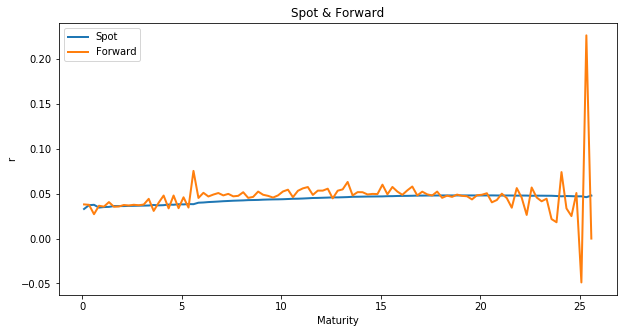

In [2]:
# Question 1 
data['Spot'] = (100/data['Price'])**(1/data['Maturity']) - 1 
data['Discount_r'] = (data['Spot']+1)**(-data['Maturity'])
data['Forward'] = ((data['Discount_r']/data['Discount_r'].shift(-1)) -1)/0.25
data = data.replace(np.nan, 0)
data = data.set_index('Maturity')
data.loc[:,['Spot','Forward']].plot(lw=2, figsize=(10,5), title = 'Spot & Forward').set(xlabel='Maturity',ylabel='r')

In [3]:
data = data.reset_index()
#Question 2
Y = np.log(data['Discount_r'])
Y

0     -0.002704
1     -0.012174
2     -0.021530
3     -0.028297
4     -0.037390
         ...   
98    -1.135069
99    -1.141311
100   -1.153914
101   -1.141624
102   -1.196666
Name: Discount_r, Length: 103, dtype: float64

In [4]:
X = pd.DataFrame({'T': data['Maturity'], 
                  'T^2': data['Maturity']**2, 
                  'T^3': data['Maturity']**3, 
                  'T^4': data['Maturity']**4, 
                  'T^5': data['Maturity']**5})
X

,T,T^2,T^3,T^4,T^5
0,0.083333,0.006944,0.000579,0.000048,4.018776e-06
1,0.333333,0.111111,0.037037,0.012346,4.115226e-03
2,0.583333,0.340278,0.198495,0.115789,6.754356e-02
3,0.833333,0.694444,0.578704,0.482253,4.018776e-01
4,1.083333,1.173611,1.271412,1.377363,1.492143e+00
...,...,...,...,...,...
98,24.583333,604.340278,14856.698495,365227.171345,8.978501e+06
99,24.833333,616.694444,15314.578704,380312.037809,9.444416e+06
100,25.083333,629.173611,15781.771412,395859.432919,9.929474e+06
101,25.333333,641.777778,16258.370370,411878.716049,1.043426e+07


In [5]:
import statsmodels.api as sm
X = pd.DataFrame({'T': data['Maturity'], 
                  'T^2': data['Maturity']**2, 
                  'T^3': data['Maturity']**3, 
                  'T^4': data['Maturity']**4, 
                  'T^5': data['Maturity']**5})
Y = np.log(data['Discount_r'])
model = sm.OLS(Y,X)
results = model.fit()

In [6]:
results.params

T     -3.262805e-02
T^2   -1.074704e-03
T^3   -1.981201e-05
T^4    2.823672e-06
T^5   -4.681743e-08
dtype: float64

In [7]:
#Question 3
X = pd.DataFrame({'T': np.arange(0.5,25.5,0.5)}) 
X['T^2']= X['T']**2
X['T^3']= X['T']**3
X['T^4']= X['T']**4
X['T^5']= X['T']**5

[Text(0, 0.5, 'r'), Text(0.5, 0, 'Maturity')]

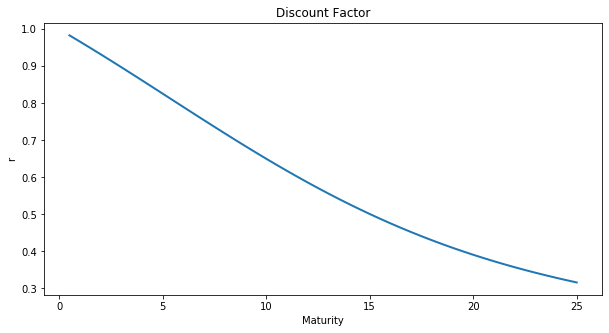

In [8]:
X['D_t']= np.exp((results.params * X).sum(axis=1))
X = X.set_index('T')
X['D_t'].plot(lw=2, figsize=(10,5), title = 'Discount Factor').set(xlabel='Maturity',ylabel='r')

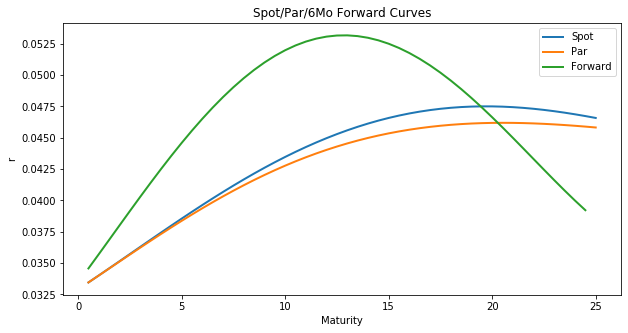

In [9]:
X= X.reset_index()
X['Spot'] = 2*((1/X['D_t'])**((1/X['T'])*(1/2)) - 1 )
#Question 4
X['cumD_t'] = X['D_t'].cumsum()
X['Par'] = 2*((100 - 100*X['D_t'])/X['cumD_t'])/100
#Question 5
X['Forward'] = 2*((X['D_t']/X['D_t'].shift(-1))-1)
X = X.set_index('T')
X.loc[:,['Spot','Par','Forward']].plot(lw=2, figsize=(10,5), title = 'Spot/Par/6Mo Forward Curves').set(xlabel='Maturity',ylabel='r')
X = X.reset_index()

In [10]:
#Question 6
Tnote = pd.read_excel('Homework 2 Data.xlsx', 'T-Note')
Tnote['T'] = Tnote['Maturity']
Tnote['T^2'] = Tnote['T']**2
Tnote['T^3'] = Tnote['T']**3
Tnote['T^4'] = Tnote['T']**4
Tnote['T^5'] = Tnote['T']**5
X = Tnote.loc[:,['T','T^2','T^3','T^4','T^5']]
Y = Tnote['Yield']
X = sm.add_constant(X)

In [11]:
X

,const,T,T^2,T^3,T^4,T^5
0,1.0,0.083333,0.006944,0.000579,0.000048,4.018776e-06
1,1.0,0.333333,0.111111,0.037037,0.012346,4.115226e-03
2,1.0,0.583333,0.340278,0.198495,0.115789,6.754356e-02
3,1.0,0.833333,0.694444,0.578704,0.482253,4.018776e-01
4,1.0,1.083333,1.173611,1.271412,1.377363,1.492143e+00
...,...,...,...,...,...,...
65,1.0,22.583333,510.006944,11517.656829,260107.083382,5.874085e+06
66,1.0,22.833333,521.361111,11904.412037,271817.408179,6.206497e+06
67,1.0,23.333333,544.444444,12703.703704,296419.753086,6.916461e+06
68,1.0,24.083333,580.006944,13968.500579,336408.055604,8.101827e+06


In [12]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    2.594357
T        0.512653
T^2     -0.079425
T^3      0.006546
T^4     -0.000252
T^5      0.000004
dtype: float64

In [13]:
# New X
X = pd.DataFrame({'T': np.arange(0.5,25.5,0.5)}) 
X['T^2']= X['T']**2
X['T^3']= X['T']**3
X['T^4']= X['T']**4
X['T^5']= X['T']**5
X = sm.add_constant(X)

In [14]:
X['FittedY'] = (results.params * X).sum(axis=1)

In [90]:
D_t = []

In [91]:
for i in range(0,len(X['FittedY'])):
    D_t = np.append(D_t, 100/(100+(X.iloc[i,6]/2)) if i==0 else (100 - (X.iloc[i,6]/2)*sum(D_t[0:len(D_t)]))/(100+(X.iloc[i,6]/2)))

[Text(0, 0.5, 'r'), Text(0.5, 0, 'Maturity')]

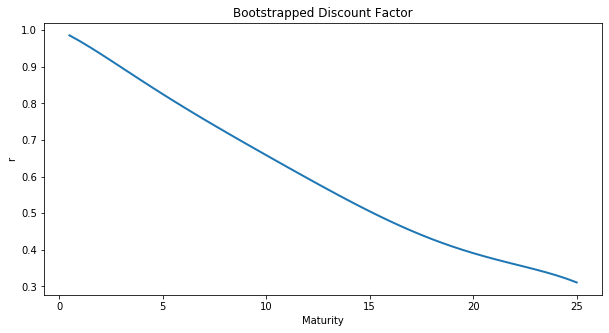

In [95]:
X['Bootstrapped D(T)'] = D_t
X = X.set_index('T')
X['Bootstrapped D(T)'].plot(lw=2, figsize=(10,5), title = 'Bootstrapped Discount Factor').set(xlabel='Maturity',ylabel='r')

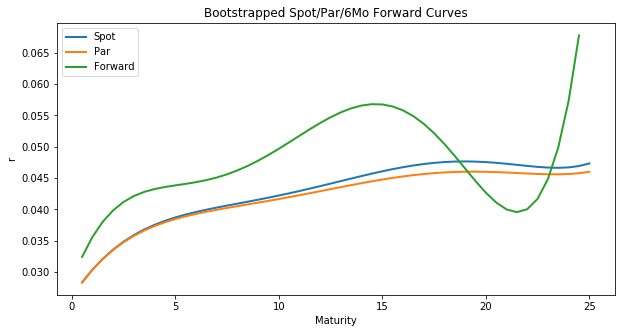

In [96]:
X= X.reset_index()
X['Spot'] = 2*((1/X['Bootstrapped D(T)'])**((1/X['T'])*(1/2)) - 1 )
#Question 4
X['cumD_t'] = X['Bootstrapped D(T)'].cumsum()
X['Par'] = 2*((100 - 100*X['Bootstrapped D(T)'])/X['cumD_t'])/100
#Question 5
X['Forward'] = 2*((X['Bootstrapped D(T)']/X['Bootstrapped D(T)'].shift(-1))-1)
X = X.set_index('T')
X.loc[:,['Spot','Par','Forward']].plot(lw=2, figsize=(10,5), title = 'Bootstrapped Spot/Par/6Mo Forward Curves').set(xlabel='Maturity',ylabel='r')
X = X.reset_index()